In [4]:
import urllib.request as req
import json
import pandas as pd

Pre-loaded historical data (for comparison):

In [47]:
with open('../../data/boston/weather/weather-201812.json') as f:
    text = f.read()

data = json.loads(text)
df = pd.DataFrame(data['observations'])
df.head()

blunt_phrase        class clds day_ind  dewPt  expire_time_gmt  feels_like  \
0         None  observation  OVC       N     -3       1543650840        -1.0   
1         None  observation  OVC       N     -3       1543654440        -1.0   
2         None  observation  OVC       N     -3       1543658040        -1.0   
3         None  observation  OVC       N     -3       1543661640        -2.0   
4         None  observation  BKN       N     -3       1543665240        -2.0   

   gust  heat_index  icon_extd      ...       uv_index  valid_time_gmt   vis  \
0   NaN           3       2600      ...              0      1543643640  16.0   
1   NaN           3       2600      ...              0      1543647240  16.0   
2   NaN           3       2600      ...              0      1543650840  16.0   
3   NaN           2       2600      ...              0      1543654440  16.0   
4   NaN           2       2700      ...              0      1543658040  16.0   

  water_temp   wc   wdir  wdir_cardinal  wspd wx_icon      wx_phrase  
0       None -1.0  300.0            WNW  15.0      26         Cloudy  
1       None -1.0  290.0            WNW  11.0      26         Cloudy  
2       None -1.0  310.0             NW  13.0      26         Cloudy  
3       None -2.0  320.0             NW  17.0      26         Cloudy  
4       None -2.0  320.0             NW  15.0      27  Mostly Cloudy  

[5 rows x 45 columns]

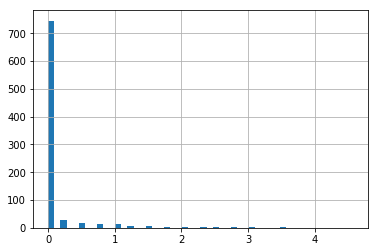

In [48]:
df.precip_hrly.hist(bins=50)

Hourly forecast

In [28]:
api_key = '6532d6454b8aa370768e63d6ba5a832e'
url = 'https://api.weather.com/v1/geocode/42.36416626/-71.00499725/forecast/hourly/360hour.json' + \
      '?apiKey=' + api_key + \
      '&units=m'
result_daily = json.loads(req.urlopen(url).read().decode())
result_daily

{'forecasts': [{'class': 'fod_short_range_hourly',
   'clds': 80,
   'day_ind': 'D',
   'dewpt': 12,
   'dow': 'Sunday',
   'expire_time_gmt': 1555874899,
   'fcst_valid': 1555876800,
   'fcst_valid_local': '2019-04-21T16:00:00-0400',
   'feels_like': 15,
   'golf_category': 'Very Good',
   'golf_index': 8,
   'gust': None,
   'hi': 15,
   'icon_code': 26,
   'icon_extd': 2600,
   'mslp': 1016.5,
   'num': 1,
   'phrase_12char': 'Cloudy',
   'phrase_22char': 'Cloudy',
   'phrase_32char': 'Cloudy',
   'pop': 15,
   'precip_type': 'rain',
   'qpf': 0.0,
   'rh': 80,
   'severity': 1,
   'snow_qpf': 0.0,
   'subphrase_pt1': 'Cloudy',
   'subphrase_pt2': '',
   'subphrase_pt3': '',
   'temp': 15,
   'uv_desc': 'Low',
   'uv_index': 2,
   'uv_index_raw': 1.76,
   'uv_warning': 0,
   'vis': 16.0,
   'wc': 15,
   'wdir': 175,
   'wdir_cardinal': 'S',
   'wspd': 11,
   'wxman': 'wx1200'},
  {'class': 'fod_short_range_hourly',
   'clds': 84,
   'day_ind': 'D',
   'dewpt': 12,
   'dow': 'Sunday'

In [32]:
len(result_daily['forecasts'])

360

In [30]:
for i in result_daily['forecasts'][0]:
    print(i)

gust
severity
icon_extd
expire_time_gmt
rh
uv_desc
uv_index_raw
subphrase_pt1
feels_like
mslp
wdir_cardinal
qpf
subphrase_pt3
subphrase_pt2
dewpt
phrase_22char
vis
num
uv_index
wc
icon_code
dow
hi
fcst_valid_local
wxman
uv_warning
temp
day_ind
golf_index
fcst_valid
wdir
phrase_32char
phrase_12char
snow_qpf
golf_category
pop
clds
class
precip_type
wspd


In [31]:
cont = 0
total = 0
for i in result_daily['forecasts'][0]:
    if i in df.columns: 
        cont += 1
        print(i)
    total += 1
cont, total

gust
icon_extd
expire_time_gmt
rh
uv_desc
feels_like
wdir_cardinal
vis
uv_index
wc
temp
day_ind
wdir
clds
class
wspd


(16, 40)

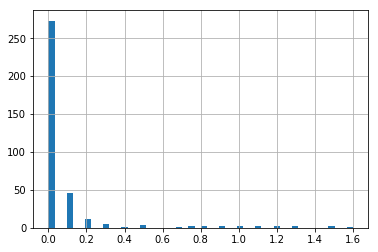

In [46]:
pd.DataFrame(result_daily['forecasts']).qpf.hist(bins=50)

Daily forecast

In [22]:
url = 'https://api.weather.com/v1/geocode/42.36416626/-71.00499725/forecast/daily/3day.json' + \
      '?apiKey=' + api_key + \
      '&units=m'
result = json.loads(req.urlopen(url).read().decode())
result

{'forecasts': [{'blurb': None,
   'blurb_author': None,
   'class': 'fod_long_range_daily',
   'dow': 'Sunday',
   'expire_time_gmt': 1555875690,
   'fcst_valid': 1555844400,
   'fcst_valid_local': '2019-04-21T07:00:00-0400',
   'lunar_phase': 'Waning Gibbous',
   'lunar_phase_code': 'WNG',
   'lunar_phase_day': 17,
   'max_temp': None,
   'min_temp': 11,
   'moonrise': '2019-04-21T22:11:03-0400',
   'moonset': '2019-04-21T07:31:43-0400',
   'narrative': 'Mostly cloudy. Low 11C.',
   'night': {'accumulation_phrase': '',
    'alt_daypart_name': 'Tonight',
    'clds': 83,
    'day_ind': 'N',
    'daypart_name': 'Tonight',
    'fcst_valid': 1555887600,
    'fcst_valid_local': '2019-04-21T19:00:00-0400',
    'golf_category': '',
    'golf_index': None,
    'hi': 17,
    'icon_code': 26,
    'icon_extd': 2600,
    'long_daypart_name': 'Sunday night',
    'narrative': 'Cloudy skies. Slight chance of a rain shower. Low 11C. Winds SW at 10 to 15 km/h.',
    'num': 1,
    'phrase_12char': 'Clou

In [23]:
cont = 0
total = 0
for i in result['forecasts'][0]:
    if i in df.columns: 
        cont += 1
        print(i)
    total += 1
cont, total

expire_time_gmt
min_temp
max_temp
qualifier
class


(5, 28)

Intraday forecast

In [24]:
url = 'https://api.weather.com/v1/geocode/42.36416626/-71.00499725/forecast/intraday/3day.json' + \
      '?apiKey=' + api_key + \
      '&units=m'
result = json.loads(req.urlopen(url).read().decode())
result

{'forecasts': [{'class': 'fod_long_range_intraday',
   'clds': 86,
   'daypart_name': 'Evening',
   'dow': 'Sunday',
   'expire_time_gmt': 1555875690,
   'fcst_valid': 1555887600,
   'fcst_valid_local': '2019-04-21T19:00:00-0400',
   'icon_code': 26,
   'icon_extd': 2600,
   'num': 1,
   'phrase_12char': 'Cloudy',
   'phrase_22char': 'Cloudy',
   'phrase_32char': 'Cloudy',
   'pop': 15,
   'precip_type': 'rain',
   'qualifier': 'Slight chance of a rain shower.',
   'qualifier_code': None,
   'rh': 76,
   'subphrase_pt1': 'Cloudy',
   'subphrase_pt2': '',
   'subphrase_pt3': '',
   'temp': 15,
   'wdir': 205,
   'wdir_cardinal': 'SSW',
   'wspd': 16},
  {'class': 'fod_long_range_intraday',
   'clds': 79,
   'daypart_name': 'Overnight',
   'dow': 'Monday',
   'expire_time_gmt': 1555875690,
   'fcst_valid': 1555909200,
   'fcst_valid_local': '2019-04-22T01:00:00-0400',
   'icon_code': 26,
   'icon_extd': 2600,
   'num': 2,
   'phrase_12char': 'Cloudy',
   'phrase_22char': 'Cloudy',
   'ph

In [25]:
cont = 0
total = 0
for i in result['forecasts'][0]:
    if i in df.columns: 
        cont += 1
        print(i)
    total += 1
cont, total

icon_extd
expire_time_gmt
wspd
wdir_cardinal
qualifier
rh
temp
class
wdir
clds


(10, 25)